Text(0,0.5,'training loss')

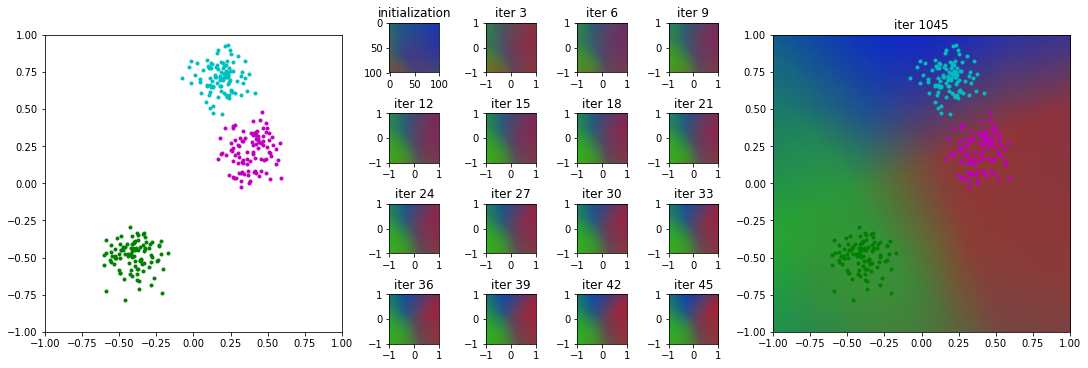

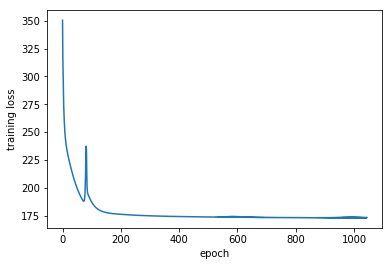

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 17 20:54:57 2020

@author: vand
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  2 14:58:04 2020

@author: vand
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

def initialize_network(number_neurons):
    # initializing weights
    W = []
    for i in range(len(number_neurons)-1):
        size = (number_neurons[i+1], number_neurons[i]+1)
        W = W + [np.random.normal(size=size)*np.sqrt(2)/np.sqrt(number_neurons[i]+1)]
    return W

def forward(x,W):
    h = x    
    # forward pass    
    for i in range(len(W)):
        h = np.r_[h, np.ones((1,h.shape[1]))] # adding bias
        z = W[i].dot(h) # linear part
        h = np.maximum(z, 0) # activation
    return z
  
def forward_backward(x, t, W, loss = None):  
    # forward pass, saving h
    H = []    
    h = x
    for i in range(len(W)):
        h = np.r_[h, np.ones((1,h.shape[1]))] # adding bias
        H = H + [h] # saving h
        z = W[i].dot(h) # linear part
        h = np.maximum(z, 0) # activation
    # backward pass
    G = []
    delta = z-t # delta for last layer
    for i in range(len(W)-1, -1, -1):
        G = [delta.dot(H[i].T)/x.shape[1]] + G # saving gradients
        delta = (H[i]>0)*W[i].T.dot(delta) # activation part and linenar part
        delta = delta[:-1] # removing bias
    if loss == 'mse': # no activation in last layer, mean square error loss
        loss = ((z-t)**2).sum()
    elif loss == 'softcross': # softmax activation in last layer, cross-entropy loss
        z = np.exp(z) # softmax
        z = z/z.sum(axis=0) # softmax normalization
        loss = -np.log(z[t]).sum() # corss-entropy loss, assumes t to be boolean
    return (G, loss, z)

def update(W,G,eta):
    # updating network
    for i in range(len(W)):
        W[i] = W[i] - eta*G[i]
    return W
     


#%% 2D input, classification
N = 100

# making training data
x = np.r_[np.random.normal(loc=[0.4, 0.2], scale=0.1, size=(N,2)),
          np.random.normal(loc=[-0.4, -0.5], scale=0.1, size=(N,2)),
          np.random.normal(loc=[0.2, 0.7], scale=0.1, size=(N,2))].T
t = np.r_[np.tile([True,False,False],[N,1]),
          np.tile([False,True,False],[N,1]),
          np.tile([False,False,True],[N,1])].T

fig = plt.figure(constrained_layout=True, figsize=(15,5))
gs = gridspec.GridSpec(ncols=12, nrows=4, figure=fig)
axA = fig.add_subplot(gs[0:4,0:4])
ax = [fig.add_subplot(gs[i,j]) for i in range(4) for j in range(4,8)]
axB = fig.add_subplot(gs[0:4,8:12])

axA.plot(x[0,t[0]],x[1,t[0]],'m.')
axA.plot(x[0,t[1]],x[1,t[1]],'g.')
axA.plot(x[0,t[2]],x[1,t[2]],'c.')
axA.set_xlim(-1,1)
axA.set_ylim(-1,1)
axA.set_aspect('equal')

number_neurons = [2, 20, 10, 3] # input, some hidden, output; not counting bias
W = initialize_network(number_neurons)
y = forward(x, W)

# making testing (querry) points
s = 100 # resolution
xq = np.array([[x1,x2] for x2 in np.linspace(1,-1,s) 
               for x1 in np.linspace(-1,1,s)]).T 

cq = np.exp(forward(xq,W))
cq = (cq/cq.sum(axis=0)).T.reshape(s,s,3)
#cq = np.argmax(np.exp(forward(xq,W)), axis=0).reshape((s,s))
ax[0].imshow(cq)
ax[0].set_title('initialization')

L = []
eta = 0.1
for i in range(15):
    for k in range(3):
        G, l = forward_backward(x, t, W, loss='softcross')[0:2]
        L = L + [l]
        W = update(W, G, eta)
    cq = np.exp(forward(xq,W))
    cq = (cq/cq.sum(axis=0)).T.reshape(s,s,3)
    #cq = np.argmax(np.exp(forward(xq, W)), axis=0).reshape((s,s))
    ax[i+1].imshow(cq, extent=(-1, 1, -1, 1))
    ax[i+1].set_title(f'iter {len(L)}')
for k in range(1000):
    G, l = forward_backward(x, t, W, loss='softcross')[0:2]
    L = L + [l]
    W = update(W, G, eta)
cq = np.exp(forward(xq,W))
cq = (cq/cq.sum(axis=0)).T.reshape(s,s,3)

axB.imshow(cq, extent=(-1, 1, -1, 1))
axB.plot(x[0,t[0]],x[1,t[0]],'m.')
axB.plot(x[0,t[1]],x[1,t[1]],'g.')
axB.plot(x[0,t[2]],x[1,t[2]],'c.')
axB.set_xlim(-1,1)
axB.set_ylim(-1,1)
axB.set_title(f'iter {len(L)}')

fig, ax = plt.subplots()
ax.plot(L)
ax.set_xlabel('epoch')
ax.set_ylabel('training loss')
 
